## TensorBoard-Keras模型训练使用TensorBoard

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np
import datetime
print(tf.__version__)
print(np.__version__)

2.0.0-rc0
1.18.4


In [2]:
mnist = np.load("mnist.npz")
x_train, y_train, x_test, y_test = mnist['x_train'],mnist['y_train'],mnist['x_test'],mnist['y_test']

x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [3]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')
    @tf.function
    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

In [4]:
model = MyModel()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="keras_logv2", 
                                                      histogram_freq=1,
                                                      profile_batch = 100000000)

model.fit(x=x_train, 
          y=y_train, 
          epochs=20, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
60000/60000 [==============================] - 26s 435us/sample - loss: 0.1322 - accuracy: 0.9598 - val_loss: 0.0634 - val_accuracy: 0.9787
Epoch 2/20
60000/60000 [==============================] - 20s 337us/sample - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0601 - val_accuracy: 0.9804
Epoch 3/20
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0618 - val_accuracy: 0.9814
Epoch 4/20
60000/60000 [==============================] - 20s 338us/sample - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 5/20
60000/60000 [==============================] - 19s 324us/sample - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0594 - val_accuracy: 0.9843
Epoch 6/20
60000/60000 [==============================] - 21s 351us/sample - loss: 0.0079 - accuracy:

In [7]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [8]:
%tensorboard --logdir keras_log

Reusing TensorBoard on port 6006 (pid 13464), started 0:37:25 ago. (Use '!kill 13464' to kill it.)

### Window 10下tensorboard打开方式

- step1、执行完上面代码 model.fit()  

- step2、cmd打开dos命令行  

- step3、把路径切换到"Keras版本.ipynb"所在目前，本例子路径为:"D:\workspace\Python-Projects\TensorFlow2.0.x-Notes\10-TensorBoard可视化工具新版>"  

- step4、执行命令tensorboard --logdir=日志所在路径，本例子生成的日志路径为:"D:\workspace\Python-Projects\TensorFlow2.0.x-Notes\10-TensorBoard可视化工具新版\keras_logv2"  

- step5、当执行完执行，看到"TensorBoard 1.15.0a20190806 at http://LAPTOP-A3MTP761:6006/ (Press CTRL+C to quit)" 表示执行成功  

- step6、在chrome浏览器地址栏输入:http://localhost:6006/ 就可以正确打开TersorBoard了  

TensorBoad界面截图如下：(注意地址不能使用127.0.0.1使用localhost可以，亲测)

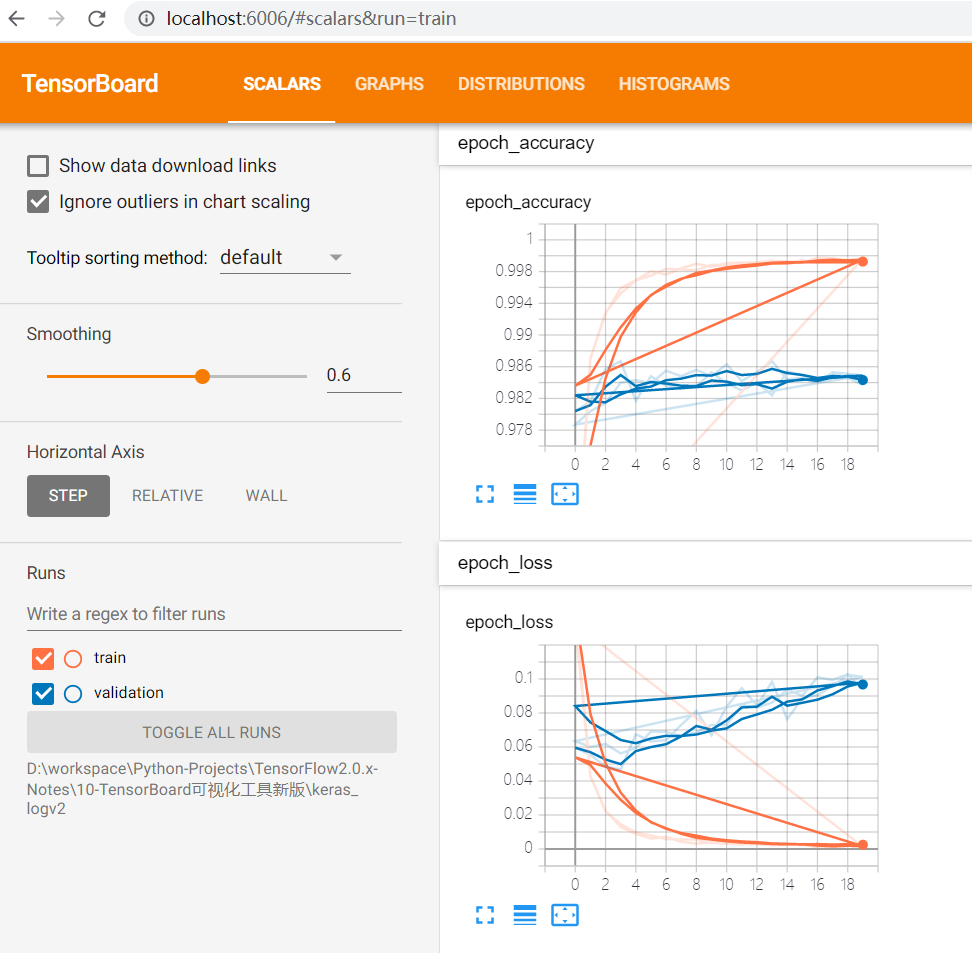

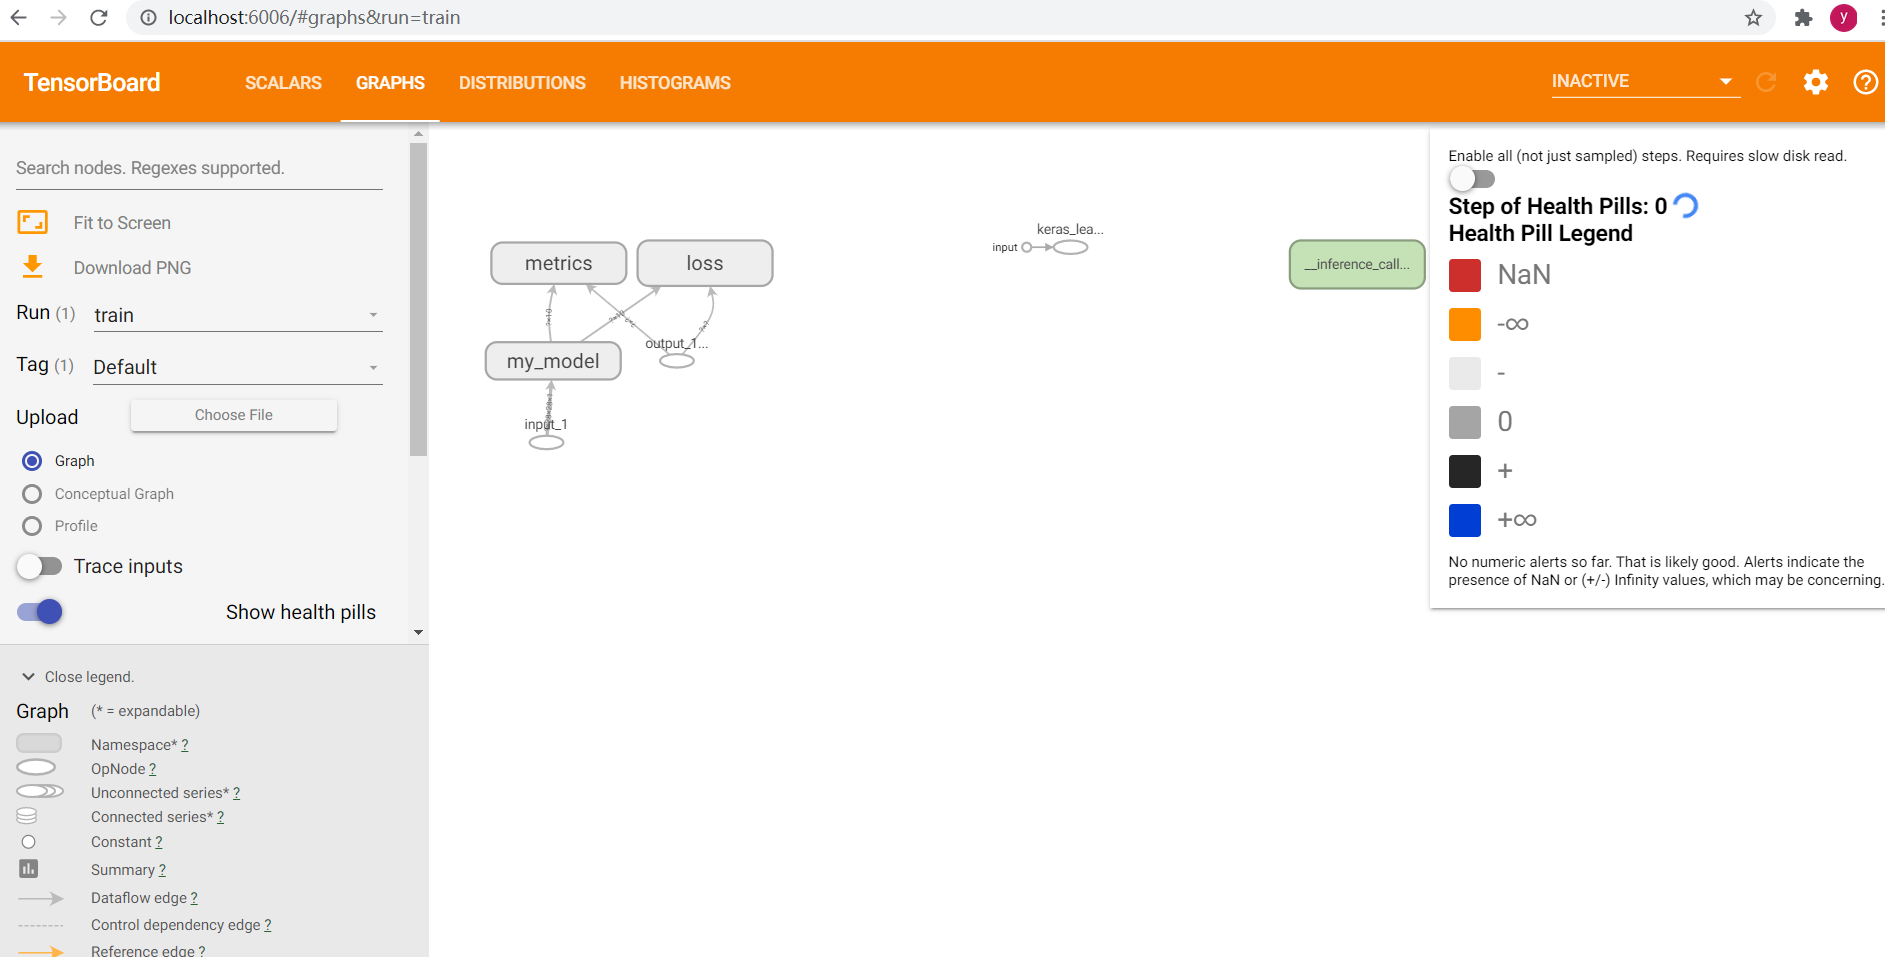

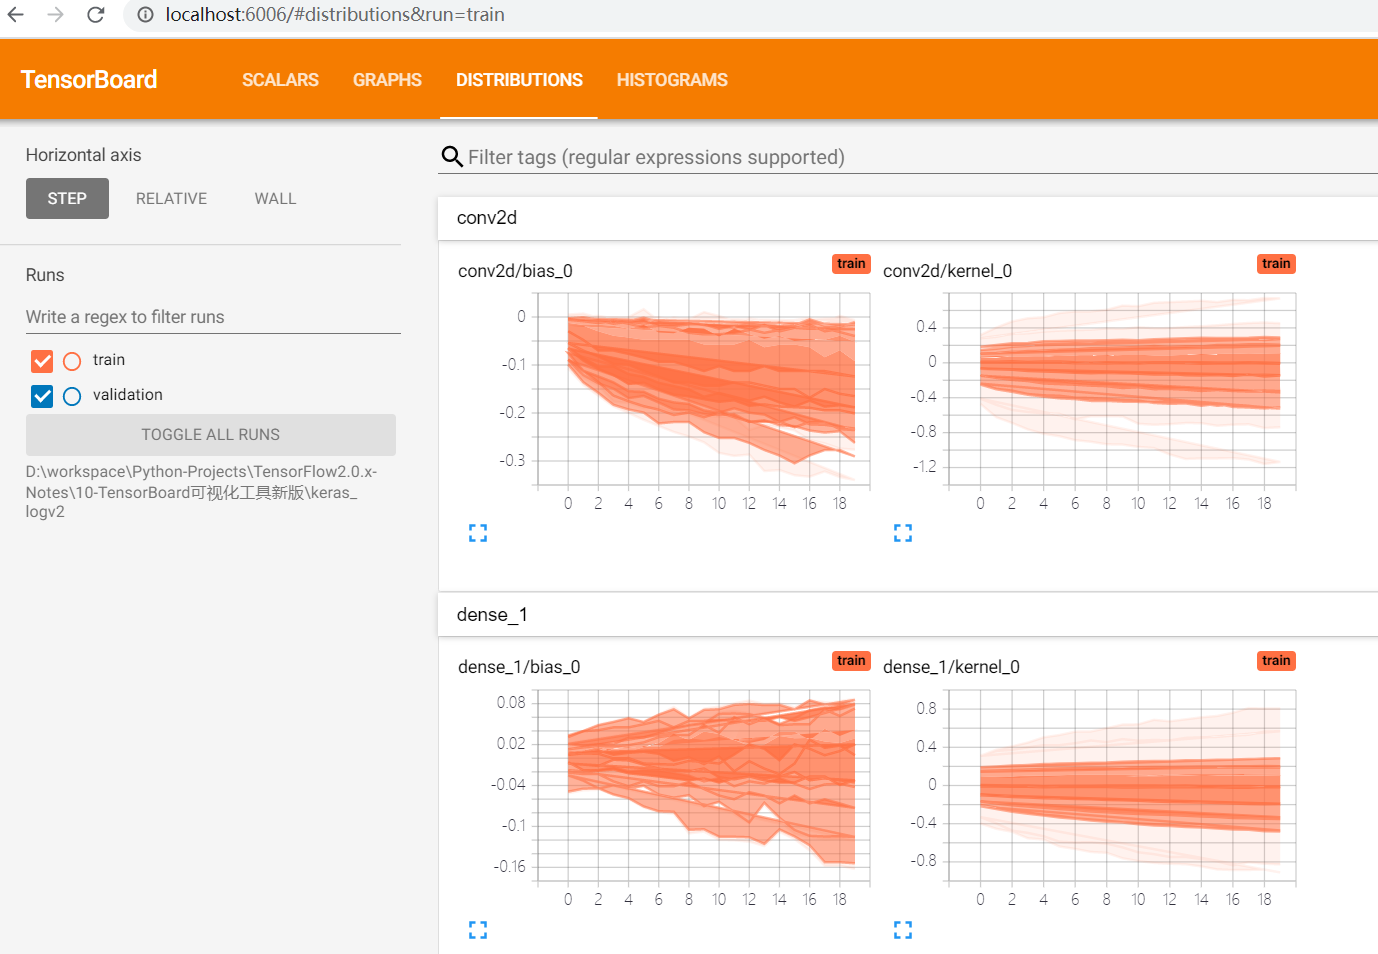

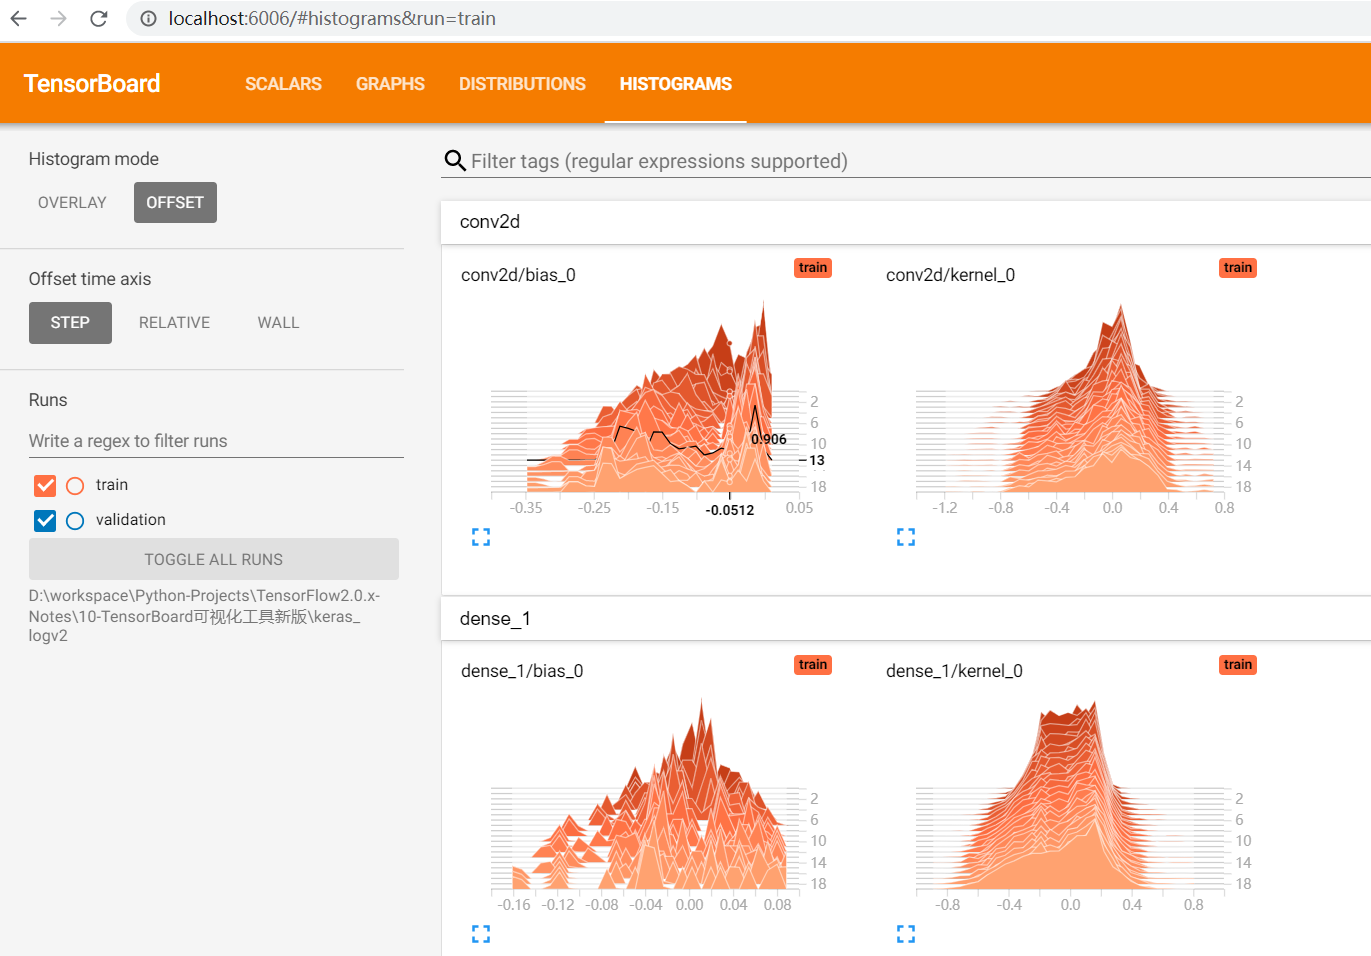